# Estudio descriptivo con SQR

In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
# Cargamos las librerías necesarias
from sklearn import preprocessing
from statistics import mode
from scipy import stats
import gower
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir('..')

In [4]:
pd.options.display.max_rows = 180

In [5]:
# Cargamos datos con SQR
perfiles_sqr = pd.read_parquet('data/processed/perfiles_sqr_filtrado.parquet')
perfiles_sqr.reset_index(drop=True, inplace=True) # reseteamos el índice

### SQR en sexo

In [6]:
perfiles_sqr.groupby('sexo').agg({'sqr': [min, max, 'mean', 'std', 'size'],})


sqr                                        
             min        max       mean        std   size
sexo                                                    
Female  0.018056  99.581944  73.031235  14.280687   9602
Male    0.548611  99.859722  71.404368  16.253099  11617

#### T-Student SQR con sexo

In [88]:
a = perfiles_sqr.loc[df_completo_pres['sexo']=="Male",'sqr']
b = perfiles_sqr.loc[df_completo_pres['sexo']=="Female",'sqr']

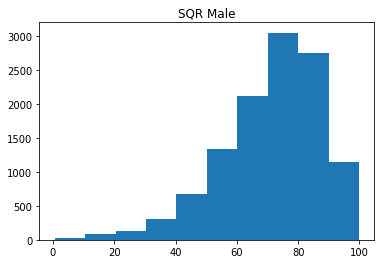

In [89]:
plt.hist(a, bins = 10)
plt.title("SQR Male")
plt.show()

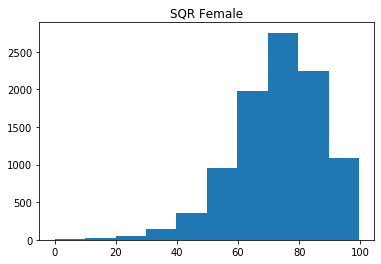

In [90]:
plt.hist(b, bins = 10)
plt.title("SQR Female")
plt.show()

In [91]:
stats.ttest_ind(a,b, equal_var = True)

Ttest_indResult(statistic=-7.663463620282485, pvalue=1.8873592538244115e-14)

In [92]:
stats.ttest_ind(a,b, equal_var = False)

Ttest_indResult(statistic=-7.757676792026737, pvalue=9.040513956796176e-15)

### SQR en posición

In [7]:
perfiles_sqr.groupby('posicion').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                        
               min        max       mean        std   size
posicion                                                  
Lateral   0.548611  99.720833  72.607845  15.312401  15013
Supine    0.018056  99.859722  71.010132  15.596523   6206

#### T-Student SQR con posición

In [93]:
a = perfiles_sqr.loc[df_completo_pres['posicion']=="Supine",'sqr']
b = perfiles_sqr.loc[df_completo_pres['posicion']=="Lateral",'sqr']

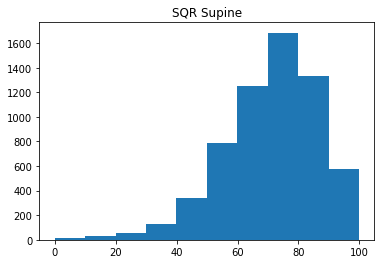

In [94]:
plt.hist(a, bins = 10)
plt.title("SQR Supine")
plt.show()

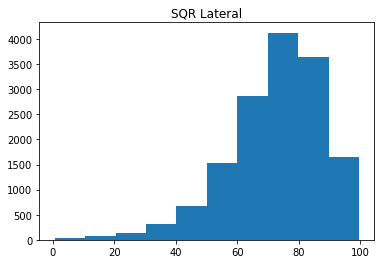

In [95]:
plt.hist(b, bins = 10)
plt.title("SQR Lateral")
plt.show()

In [96]:
stats.ttest_ind(a,b, equal_var = True)

Ttest_indResult(statistic=-6.876494728365929, pvalue=6.304791190947073e-12)

In [97]:
stats.ttest_ind(a,b, equal_var = False)

Ttest_indResult(statistic=-6.824224158800355, pvalue=9.288820759534717e-12)

In [98]:
stats.mannwhitneyu(a, b, alternative= "two-sided")

MannwhitneyuResult(statistic=43525457.0, pvalue=4.7553616054070573e-14)

In [84]:
a

10       80.488009
11       70.631243
12       67.286606
13       82.194025
14       78.711212
           ...    
21202    76.798058
21207    69.577396
21208    57.733663
21209    66.791798
21214    71.508019
Name: sqr, Length: 6206, dtype: float64

In [85]:
b

0        83.008680
1        70.773244
2        70.144818
3        87.152947
4        81.126354
           ...    
21213    80.429326
21215    56.875936
21216    71.011566
21217    99.304167
21218    55.600643
Name: sqr, Length: 15013, dtype: float64

### SQR con altura

In [99]:
a = perfiles_sqr['sqr']
b = perfiles_sqr['altura']

In [102]:
stats.pearsonr(a, b) # coefficient y p-value

(-0.11713772837751527, 1.0327922626333687e-65)

In [103]:
stats.spearmanr(a, b)

SpearmanrResult(correlation=-0.10020678471309964, pvalue=1.733783628337118e-48)

### SQR con peso

In [104]:
a = perfiles_sqr['sqr']
b = perfiles_sqr['peso']

In [105]:
stats.pearsonr(a, b) # coefficient y p-value

(-0.12979665129547227, 2.209915176380329e-80)

In [106]:
stats.spearmanr(a, b)

SpearmanrResult(correlation=-0.10173184367446282, pvalue=6.295116835624997e-50)

### SQR en altura dependiendo del sexo

In [8]:
# Categorizamos altura para hombre y mujer
perfiles_sqr["altura_cat_hombre"] = pd.cut(perfiles_sqr['altura'], bins=[0, 160, 170, 185, 250], include_lowest=True,
       labels=['<1.6', '1.6-1.7', '1.7-1.85', '>1.85'])
perfiles_sqr["altura_cat_mujer"] = pd.cut(perfiles_sqr['altura'], bins=[0, 150, 160, 170, 250], include_lowest=True,
       labels=['<1.50', '1.5-1.6', '1.6-1.7', '>1.7'])

#### Hombres

In [9]:
perfiles_sqr[perfiles_sqr['sexo']=="Male"].groupby('altura_cat_hombre').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                       
                        min        max       mean        std  size
altura_cat_hombre                                                 
<1.6               2.225000  99.581944  85.760953  11.529887   243
1.6-1.7            2.769516  99.720833  73.076367  14.978376  1844
1.7-1.85           0.548611  99.859722  71.179566  16.202410  8831
>1.85              2.775000  99.136207  64.842726  17.715198   699

#### Mujeres

In [10]:
perfiles_sqr[perfiles_sqr['sexo']=="Female"].groupby('altura_cat_mujer').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                       
                        min        max       mean        std  size
altura_cat_mujer                                                  
<1.50             20.570440  98.244444  70.849535  13.748207   272
1.5-1.6            0.018056  99.581944  74.195356  14.419974  3558
1.6-1.7            2.319444  99.581944  72.941785  14.376424  4660
>1.7               4.988769  99.372222  70.214969  13.051740  1112

### SQR en peso dependiendo del sexo

In [11]:
# Categorizamos peso para hombre y mujer
perfiles_sqr["peso_cat_hombre"] = pd.cut(perfiles_sqr['peso'], bins=[0, 60, 75, 90, 250], include_lowest=True,
       labels=['<60', '60-75', '75-90', '>90'])
perfiles_sqr["peso_cat_mujer"] = pd.cut(perfiles_sqr['peso'], bins=[0, 50, 65, 80, 250], include_lowest=True,
       labels=['<50', '50-65', '65-80', '>80'])

#### Hombres

In [12]:
perfiles_sqr[perfiles_sqr['sexo']=="Male"].groupby('peso_cat_hombre').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                       
                      min        max       mean        std  size
peso_cat_hombre                                                 
<60              2.225000  99.581944  82.064643  18.635911   158
60-75            0.548611  99.859722  72.810526  16.085990  3544
75-90            0.627778  99.581944  71.207325  15.823615  4975
>90              1.523611  99.581944  69.469860  16.658906  2940

#### Mujeres

In [13]:
perfiles_sqr[perfiles_sqr['sexo']=="Female"].groupby('peso_cat_mujer').agg({'sqr': [min, max, 'mean', 'std', 'size'],})

sqr                                       
                      min        max       mean        std  size
peso_cat_mujer                                                  
<50             12.826389  99.581944  76.925212  16.753817   792
50-65            0.018056  99.581944  73.931825  13.981681  5219
65-80            3.105556  99.581944  71.035790  13.531335  3015
>80              5.200000  99.581944  69.961887  15.059389   576

## Ejemplos

In [14]:
cat_bigmen = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"] == "Supine") 
                               & (perfiles_sqr["altura"]>=180) & (perfiles_sqr["peso"] >= 80)]
cat_smallwomen = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"] == "Lateral")
                                   & (perfiles_sqr["altura"]<=160) & (perfiles_sqr["peso"] <= 60)]
# Cambiamos la posicion
cat_bigmen2 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"] == "Lateral") 
                               & (perfiles_sqr["altura"]>=180) & (perfiles_sqr["peso"] >= 80)]
cat_smallwomen2 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"] == "Supine")
                                   & (perfiles_sqr["altura"]<=160) & (perfiles_sqr["peso"] <= 60)]

In [15]:
# Hombres grandes Supine
cat_bigmen['sqr'].describe()

count    1443.000000
mean       68.049752
std        16.493268
min         0.627778
25%        57.310286
50%        70.138830
75%        80.269179
max        99.358333
Name: sqr, dtype: float64

In [16]:
# Hombres grandes Lateral
cat_bigmen2['sqr'].describe()

count    1977.000000
mean       67.181066
std        16.727695
min         2.775000
25%        57.495087
50%        69.446911
75%        79.164704
max        99.581944
Name: sqr, dtype: float64

In [17]:
# Mujeres pequeñas Supine
cat_smallwomen['sqr'].describe()

count    1986.000000
mean       76.839827
std        13.532747
min        12.973611
25%        68.169656
50%        78.268624
75%        87.371086
max        99.581944
Name: sqr, dtype: float64

In [18]:
# Mujeres pequeñas Lateral
cat_smallwomen2['sqr'].describe()

count    484.000000
mean      73.248932
std       15.229652
min        0.018056
25%       65.227439
50%       75.486445
75%       84.207626
max       99.579167
Name: sqr, dtype: float64

# Estudio profundo del SQR en todas las categorias

#### Individuos con SQR>65

In [19]:
df_sqr65 = perfiles_sqr[perfiles_sqr["sqr"]>65]
df_sqr65.groupby(["sexo","posicion"]).size()
df_sqr65.groupby(["sexo","posicion","presiones"]).size()

sexo    posicion  presiones
Female  Lateral   000000       115
                  000001         3
                  000321        52
                  001310        27
                  002211         5
                  010001         1
                  011000        80
                  011100        10
                  011111        10
                  012211       614
                  012221       580
                  012222        14
                  012311       105
                  012321         2
                  022110        70
                  022111       532
                  022211       322
                  022212        18
                  022311        23
                  022321       119
                  022332        32
                  023111        80
                  023112       195
                  023211       364
                  023321       420
                  023332        18
                  023421         1
                  033211   

#### Individuos con SQR>50

In [20]:
df_sqr50 = perfiles_sqr[perfiles_sqr["sqr"]>50]
df_sqr50.groupby(["sexo","posicion","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})

sqr                                      
                                 min        max       mean        std size
sexo   posicion presiones                                                 
Female Lateral  000000     51.879668  98.036300  82.084493  10.508851  125
                000001     70.387602  79.118246  74.254890   4.449736    3
                000321     60.886760  99.194444  83.898963   9.959861   54
                001310     60.964778  95.783600  85.810415   9.408268   28
                002211     52.773314  87.228513  63.987872   8.526788   16
                010001     50.956924  74.546475  62.751700  16.680331    2
                011000     70.736597  95.411592  85.495803   5.967315   80
                011100     72.631039  99.336111  86.980774  10.057034   10
                011111     60.903483  88.083788  75.595045   8.799226   12
                012211     50.498766  99.581944  74.867139  11.328345  787
                012221     50.098049  99.255278  75.520535  11.621417  718
                012222     71.254549  92.580203  81.391096   6.972250   14
                012311     50.903023  95.753840  71.322007  11.019813  148
                012321     50.854371  87.190482  63.147913  13.095056    8
                022110     54.924740  99.356944  77.347163   8.405417   77
                022111     50.376462  99.443056  72.571542  10.822075  730
                022211     50.047930  99.375000  77.998578  10.615517  367
                022212     50.249184  98.893056  68.346626  14.175923   36
                022311     71.708379  97.512500  87.281840   7.550356   23
                022321     50.157423  98.738889  73.843165  10.233347  150
                022332     53.924328  91.428706  72.234637   9.394422   40
                023111     53.263108  98.747222  82.030886  10.276613   87
                023112     68.866246  99.581944  91.387150   5.827397  195
                023211     50.237067  96.499320  72.818018  10.245250  476
                023321     50.695158  99.581944  77.658972   9.692514  474
                023332     57.662631  93.196218  75.654911   9.698812   22
                023421     66.046539  66.046539  66.046539        NaN    1
                033211     50.012899  90.959712  71.519058   9.330367  226
                033212     50.210986  92.541447  71.656748  11.801327   82
                033222     66.803643  66.803643  66.803643        NaN    1
                033321     53.760936  99.373611  83.019330  11.118094   86
                043311     66.908673  96.825000  80.971327   8.176120   21
                101111     50.130205  93.077591  70.168921  10.989883   49
                102012     51.960726  84.924216  62.174953  10.493335   10
                112221     54.773022  98.882077  80.578697   9.319117  214
                112232     86.940002  86.940002  86.940002        NaN    1
                112321     50.511591  98.981944  76.765763  10.706160  352
                122211     54.584577  98.590278  73.399327  10.783891  121
                122212     60.430077  98.580413  85.474155   7.790161  189
                122321     50.221234  99.375000  70.257569  10.672229  308
                123211     50.028653  85.734179  65.514355   8.030135  129
                123212     83.726389  98.661111  91.035597   4.611725    9
                123321     51.699995  96.060080  69.823655   9.342361   81
                123421     60.262277  95.514835  80.111538   9.384039   23
                133301     50.859564  95.698802  67.470904   8.907420   47
                133321     99.341667  99.341667  99.341667        NaN    1
                133431     51.063242  94.835976  70.059496  11.743525   31
                133432     58.960378  79.087436  67.881607   8.855491    4
                134312     69.370875  69.370875  69.370875        NaN    1
                222222     79.739479  79.739479  79.739479        NaN    1
                223344     73.468265  99.559722  88.395727

#### Individuos con SQR<40

In [21]:
df_sqr40 = perfiles_sqr[perfiles_sqr["sqr"]<40]
df_sqr40.groupby(["sexo","posicion","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})

sqr                                      
                                 min        max       mean        std size
sexo   posicion presiones                                                 
Female Lateral  000000      4.988769  35.616863  25.387304  17.665675    3
                002211     23.816383  33.421932  27.295276   5.322089    3
                012211      4.398611  39.993924  30.667093   7.918568   40
                012221      2.319444  38.724695  29.959353   8.758003   33
                012311     26.445396  38.768433  32.827882   5.133486    9
                022110     39.271901  39.449899  39.360900   0.125863    2
                022111     12.973611  39.188892  31.651318   7.862768   12
                022211     35.560993  37.688013  36.624503   1.504031    2
                022212      1.005556  39.655923  24.286523  18.306635    4
                022321     16.329778  36.092713  28.965799   8.676959    4
                023211      4.818056  39.669859  26.236939   9.725970   12
                023321     27.000971  39.142449  32.454328   5.153223    5
                023332     24.947370  36.847721  30.897545   8.414819    2
                033211      3.105556  38.646598  28.146378  12.002611   12
                033212     31.941987  38.840760  35.446322   3.450699    3
                101111     21.351583  39.199133  27.662457  10.005774    3
                102012     39.306286  39.306286  39.306286        NaN    1
                122212     17.141784  17.141784  17.141784        NaN    1
                122321      8.665062  39.438605  29.769504   9.161129   11
                123211     32.284631  32.885182  32.584907   0.424654    2
                123421     38.685864  38.685864  38.685864        NaN    1
                133301     30.178174  38.992134  34.585154   6.232411    2
                133431     15.918097  38.562095  30.466948   9.331163    5
                335532      5.200000  39.657406  28.216709   9.653473   11
                555555     39.996527  39.996527  39.996527        NaN    1
       Supine   022333     34.405716  34.405716  34.405716        NaN    1
                110012     36.582341  36.582341  36.582341        NaN    1
                111111     13.688456  13.688456  13.688456        NaN    1
                122212      0.018056  38.705497  26.454309  12.430867   14
                122221     36.552826  37.889665  37.432096   0.761681    3
                122222      8.123101  39.904975  29.398665  11.211171   11
                122232     29.982671  34.246123  32.114397   3.014716    2
                122322     26.017866  37.627703  31.562576   5.749381    4
                123222     19.984233  39.162033  34.207542   8.217761    5
                133331     20.319017  39.879081  32.853144   6.414445    8
                555555      8.857392   8.857392   8.857392        NaN    1
Male   Lateral  000000      2.769516  39.688107  28.838139  11.432491   11
                003333     31.108168  31.108168  31.108168        NaN    1
                010010     29.981996  29.981996  29.981996        NaN    1
                011122      9.386739  39.860369  26.251437   9.133901   26
                012221     26.305531  34.634825  30.470178   5.889701    2
                012222     35.038245  35.038245  35.038245        NaN    1
                012232      4.696099  39.954219  29.939311   9.494712   34
                012332     39.760970  39.760970  39.760970        NaN    1
                021112     25.192097  39.384441  33.157641   4.337782   11
                022221     35.653263  37.638187  36.972500   1.142508    3
                022321      0.548611  39.829656  30.362484  10.190669   28
                022332      1.523611  39.558979  27.018529  10.432342   34
                022421     34.432226  38.427565  37.010368   2.236409    3
                023321     22.202053  33.676325  27.726781   5.466523    5
                023332     18.841904  38.215711  29.695834

## Estudio estadístico de relación SQR con variables presiones

In [24]:
perfiles_sqr.head(10)

,idSesiones,fechaInicio,fechaFin,idImatt,sqr,lecho,notaUsuario,suenios,deporte,alcohol,...,peso,sexo,posicion,activo,presiones,presiones_old,altura_cat_hombre,altura_cat_mujer,peso_cat_hombre,peso_cat_mujer
0,25875,2019-04-26 02:19:56,2019-04-26 09:37:05,629,83.008680,2.0,NaN,None,NaN,NaN,...,75.0,Male,Lateral,1,122232,112222321122,1.7-1.85,>1.7,60-75,65-80
1,25939,2019-04-26 23:12:10,2019-04-27 08:23:29,629,70.773244,1.0,NaN,None,NaN,NaN,...,75.0,Female,Lateral,0,023321,002233211222,1.6-1.7,1.6-1.7,60-75,65-80
2,26043,2019-04-28 01:40:41,2019-04-28 09:31:02,348,70.144818,1.0,NaN,None,NaN,NaN,...,70.0,Male,Lateral,1,122232,112222321222,1.7-1.85,>1.7,60-75,65-80
3,26044,2019-04-28 01:22:27,2019-04-28 09:24:38,348,87.152947,2.0,NaN,None,NaN,NaN,...,50.0,Female,Lateral,1,023111,002231112222,<1.6,1.5-1.6,<60,<50
4,26076,2019-04-28 00:44:59,2019-04-28 08:39:49,629,81.126354,1.0,NaN,None,NaN,NaN,...,75.0,Female,Lateral,0,023321,002233211222,1.6-1.7,1.6-1.7,60-75,65-80
5,26077,2019-04-28 02:49:40,2019-04-28 10:49:17,629,77.598576,2.0,NaN,None,NaN,NaN,...,75.0,Male,Lateral,1,122232,112222321122,1.7-1.85,>1.7,60-75,65-80
6,26115,2019-04-28 22:31:14,2019-04-29 07:36:49,629,73.638184,1.0,NaN,None,NaN,NaN,...,75.0,Female,Lateral,0,023321,002233211222,1.6-1.7,1.6-1.7,60-75,65-80
7,26217,2019-04-29 22:46:47,2019-04-30 07:36:02,629,60.920385,1.0,NaN,None,NaN,NaN,...,75.0,Female,Lateral,0,023321,002233211222,1.6-1.7,1.6-1.7,60-75,65-80
8,26302,2019-05-01 00:14:44,2019-05-01 08:44:00,629,84.417397,1.0,NaN,None,NaN,NaN,...,75.0,Female,Lateral,0,023321,002233211222,1.6-1.7,1.6-1.7,60-75,65-80
9,26303,2019-05-01 02:00:36,2019-05-01 09:41:53,629,79.617077,2.0,NaN,None,NaN,NaN,...,75.0,Male,Lateral,1,122232,112222321122,1.7-1.85,>1.7,60-75,65-80


In [38]:
# Seleccionamos las variables de interés
df_pres = perfiles_sqr[['idSesiones','sqr','altura','peso','sexo','posicion','presiones']]
df_pres.head(5)

,idSesiones,sqr,altura,peso,sexo,posicion,presiones
0,25875,83.008680,178.0,75.0,Male,Lateral,122232
1,25939,70.773244,162.0,75.0,Female,Lateral,023321
2,26043,70.144818,180.0,70.0,Male,Lateral,122232
3,26044,87.152947,160.0,50.0,Female,Lateral,023111
4,26076,81.126354,162.0,75.0,Female,Lateral,023321


In [44]:
# Separamos las presiones para tenerlas como 6 variables
cols = ['PresPos1', 'PresPos2', 'PresPos3', 'PresPos4', 'PresPos5', 'PresPos6']
rows = range(len(df_pres[['presiones']]))
df_pres_split = pd.DataFrame(columns=cols, index=rows)
df_pres_split

,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
21214,NaN,NaN,NaN,NaN,NaN,NaN
21215,NaN,NaN,NaN,NaN,NaN,NaN
21216,NaN,NaN,NaN,NaN,NaN,NaN
21217,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Separamos las presiones para tenerlas como 6 variables
cols = ['PresPos1', 'PresPos2', 'PresPos3', 'PresPos4', 'PresPos5', 'PresPos6']
rows = range(len(df_pres[['presiones']]))
df_pres_split = pd.DataFrame(columns=cols, index=rows)

for j in range(len(df_pres[['presiones']])):
    pres_j = df_pres.iloc[j,-1]
    pres_j_split = [pres_j[i:i + 1] for i in range(0, len(pres_j), 1)]
    df_pres_split.iloc[j, :] = pres_j_split
# juntamos todo
df_completo_pres = pd.concat([df_pres, df_pres_split], axis=1)
df_completo_pres.head()

,idSesiones,sqr,altura,peso,sexo,posicion,presiones,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6
0,25875,83.008680,178.0,75.0,Male,Lateral,122232,1,2,2,2,3,2
1,25939,70.773244,162.0,75.0,Female,Lateral,023321,0,2,3,3,2,1
2,26043,70.144818,180.0,70.0,Male,Lateral,122232,1,2,2,2,3,2
3,26044,87.152947,160.0,50.0,Female,Lateral,023111,0,2,3,1,1,1
4,26076,81.126354,162.0,75.0,Female,Lateral,023321,0,2,3,3,2,1


#### ANOVA con presiones

In [118]:
from scipy.stats import f_oneway

In [119]:
df_completo_pres.groupby(["PresPos1"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})

sqr                                       
                min        max       mean        std  size
PresPos1                                                  
0          0.548611  99.720833  72.601943  15.090361  9684
1          0.018056  99.859722  71.755330  15.535917  8464
2          1.523611  99.581944  70.594354  16.243762  1791
3          5.200000  99.581944  74.177582  14.898699   628
4         35.393210  99.581944  75.105263  14.771614   100
5          7.991667  99.566667  72.115225  16.422189   552

In [127]:
pres1 = df_completo_pres.loc[df_completo_pres['PresPos3']=="0",'sqr']
pres2 = df_completo_pres.loc[df_completo_pres['PresPos3']=="1",'sqr']
pres3 = df_completo_pres.loc[df_completo_pres['PresPos3']=="2",'sqr']
pres4 = df_completo_pres.loc[df_completo_pres['PresPos3']=="3",'sqr']
pres5 = df_completo_pres.loc[df_completo_pres['PresPos3']=="4",'sqr']
pres6 = df_completo_pres.loc[df_completo_pres['PresPos3']=="5",'sqr']

In [128]:
f_oneway(pres1,pres2,pres3,pres4,pres5,pres6)

F_onewayResult(statistic=20.474332911961426, pvalue=1.8768698876843723e-20)

In [129]:
stats.kruskal(pres1,pres2,pres3,pres4,pres5,pres6)

KruskalResult(statistic=81.57655212067115, pvalue=3.925679142762038e-16)

## Categorización del SQR

In [132]:
df_completo_pres['sqr'].quantile([0.25,0.5,0.75])

0.25    63.448186
0.50    74.257863
0.75    83.089491
Name: sqr, dtype: float64

In [133]:
# Categorizamos SQR
df_completo_pres["sqr_cat1"] = pd.cut(df_completo_pres['sqr'], bins=[0, 65, 75, 101], include_lowest=True,
       labels=['cuartil1', 'cuartil2', 'cuartil3'])
df_completo_pres["sqr_cat2"] = pd.cut(df_completo_pres['sqr'], bins=[0, 74.26, 101], include_lowest=True,
       labels=['abajo_med', 'arriba_med'])
df_completo_pres["sqr_cat3"] = pd.cut(df_completo_pres['sqr'], bins=[0, 50, 75, 101], include_lowest=True,
       labels=['mal', 'regular', 'bien'])

In [137]:
from scipy.stats import chi2_contingency

#### Primera categorización

In [140]:
# sexo
tabla = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["sexo"])
tabla

sexo,Female,Male
sqr_cat1,,
cuartil1,2457,3446
cuartil2,2475,2651
cuartil3,4670,5520


In [138]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(51.76296317087593, 5.7519534669214515e-12)

In [143]:
# posicion
tabla = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["posicion"])
tabla

posicion,Lateral,Supine
sqr_cat1,,
cuartil1,4004,1899
cuartil2,3600,1526
cuartil3,7409,2781


In [144]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(43.88215008756495, 2.9587766416278507e-10)

In [149]:
# presiones
tabla1 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos1"])
tabla2 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos2"])
tabla3 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos3"])
tabla4 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos4"])
tabla5 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos5"])
tabla6 = pd.crosstab(df_completo_pres["sqr_cat1"],df_completo_pres["PresPos6"])

tabla1

PresPos1,0,1,2,3,4,5
sqr_cat1,,,,,,
cuartil1,2566,2468,549,142,23,155
cuartil2,2352,2039,416,166,23,130
cuartil3,4766,3957,826,320,54,267


In [150]:
g1, p1, dof, expctd = chi2_contingency(tabla1)
g2, p2, dof, expctd = chi2_contingency(tabla2)
g3, p3, dof, expctd = chi2_contingency(tabla3)
g4, p4, dof, expctd = chi2_contingency(tabla4)
g5, p5, dof, expctd = chi2_contingency(tabla5)
g6, p6, dof, expctd = chi2_contingency(tabla6)

In [151]:
[p1,p2,p3,p4,p5,p6]

[0.00013262823575289657,
 2.5973289766469993e-40,
 8.048703629591642e-20,
 1.5167007577655377e-12,
 1.0743815517813178e-36,
 9.145249991977711e-15]

In [152]:
# altura
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil1",'altura']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil2",'altura']
sqr3 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil3",'altura']

In [153]:
f_oneway(sqr1,sqr2,sqr3)

F_onewayResult(statistic=93.30609082773192, pvalue=4.517051348238377e-41)

In [154]:
# peso
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil1",'peso']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil2",'peso']
sqr3 = df_completo_pres.loc[df_completo_pres['sqr_cat1']=="cuartil3",'peso']

In [155]:
f_oneway(sqr1,sqr2,sqr3)

F_onewayResult(statistic=107.30464988883053, pvalue=4.288488458294824e-47)

#### Segunda categorización

In [156]:
# sexo
tabla = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["sexo"])
tabla

sexo,Female,Male
sqr_cat2,,
abajo_med,4740,5870
arriba_med,4862,5747


In [157]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(2.805965171260453, 0.09391431075717353)

In [158]:
# posicion
tabla = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["posicion"])
tabla

posicion,Lateral,Supine
sqr_cat2,,
abajo_med,7278,3332
arriba_med,7735,2874


In [159]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(47.50310469911898, 5.491690000526455e-12)

In [160]:
# presiones
tabla1 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos1"])
tabla2 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos2"])
tabla3 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos3"])
tabla4 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos4"])
tabla5 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos5"])
tabla6 = pd.crosstab(df_completo_pres["sqr_cat2"],df_completo_pres["PresPos6"])

tabla1

PresPos1,0,1,2,3,4,5
sqr_cat2,,,,,,
abajo_med,4719,4360,926,293,44,268
arriba_med,4965,4104,865,335,56,284


In [161]:
g1, p1, dof, expctd = chi2_contingency(tabla1)
g2, p2, dof, expctd = chi2_contingency(tabla2)
g3, p3, dof, expctd = chi2_contingency(tabla3)
g4, p4, dof, expctd = chi2_contingency(tabla4)
g5, p5, dof, expctd = chi2_contingency(tabla5)
g6, p6, dof, expctd = chi2_contingency(tabla6)

In [162]:
[p1,p2,p3,p4,p5,p6]

[0.0008904927701649758,
 5.877746521981402e-39,
 1.4920570738204635e-13,
 1.2904405503275326e-09,
 2.8708120199530615e-26,
 7.090677150497563e-05]

In [163]:
# altura
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat2']=="abajo_med",'altura']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat2']=="arriba_med",'altura']


In [164]:
stats.ttest_ind(sqr1,sqr2, equal_var = True)

Ttest_indResult(statistic=10.57574124204834, pvalue=4.48375130198133e-26)

In [165]:
stats.ttest_ind(sqr1,sqr2, equal_var = False)

Ttest_indResult(statistic=10.575751901061953, pvalue=4.4835469021498694e-26)

In [167]:
# peso
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat2']=="abajo_med",'peso']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat2']=="arriba_med",'peso']


In [168]:
stats.ttest_ind(sqr1,sqr2, equal_var = True)

Ttest_indResult(statistic=12.469076863434884, pvalue=1.467052379386547e-35)

In [169]:
stats.ttest_ind(sqr1,sqr2, equal_var = False)

Ttest_indResult(statistic=12.469118431155598, pvalue=1.4683847843497546e-35)

#### Tercera categorización

In [170]:
# sexo
tabla = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["sexo"])
tabla

sexo,Female,Male
sqr_cat3,,
mal,594,1179
regular,4338,4918
bien,4670,5520


In [171]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(109.90973127739275, 1.3595810395868953e-24)

In [172]:
# posicion
tabla = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["posicion"])
tabla

posicion,Lateral,Supine
sqr_cat3,,
mal,1198,575
regular,6406,2850
bien,7409,2781


In [173]:
g, p, dof, expctd = chi2_contingency(tabla)
g, p

(38.17776447747859, 5.126297164192863e-09)

In [174]:
# presiones
tabla1 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos1"])
tabla2 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos2"])
tabla3 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos3"])
tabla4 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos4"])
tabla5 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos5"])
tabla6 = pd.crosstab(df_completo_pres["sqr_cat3"],df_completo_pres["PresPos6"])

tabla1

PresPos1,0,1,2,3,4,5
sqr_cat3,,,,,,
mal,753,733,193,38,6,50
regular,4165,3774,772,270,40,235
bien,4766,3957,826,320,54,267


In [175]:
g1, p1, dof, expctd = chi2_contingency(tabla1)
g2, p2, dof, expctd = chi2_contingency(tabla2)
g3, p3, dof, expctd = chi2_contingency(tabla3)
g4, p4, dof, expctd = chi2_contingency(tabla4)
g5, p5, dof, expctd = chi2_contingency(tabla5)
g6, p6, dof, expctd = chi2_contingency(tabla6)

In [151]:
[p1,p2,p3,p4,p5,p6]

[0.00013262823575289657,
 2.5973289766469993e-40,
 8.048703629591642e-20,
 1.5167007577655377e-12,
 1.0743815517813178e-36,
 9.145249991977711e-15]

In [183]:
# altura
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="mal",'altura']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="regular",'altura']
sqr3 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="bien",'altura']

In [184]:
f_oneway(sqr1,sqr2,sqr3)

F_onewayResult(statistic=121.96608157361366, pvalue=2.152771022179349e-53)

In [185]:
# peso
sqr1 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="mal",'peso']
sqr2 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="regular",'peso']
sqr3 = df_completo_pres.loc[df_completo_pres['sqr_cat3']=="bien",'peso']

In [186]:
f_oneway(sqr1,sqr2,sqr3)

F_onewayResult(statistic=131.96483516288518, pvalue=1.1014197193205428e-57)

## Estudiamos por categorías (ANTES DE ARREGLAR EL SQR)

In [22]:
# Número mínimo de observaciones que admitimos en cada categoría
min_obs = 9

### Hombres Supine

In [23]:
summary_male_supine = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine")].\
    groupby(["altura_cat_hombre","peso_cat_hombre","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
# quitamos las categorías con 0 o 1 elementos
summary_male_supine=summary_male_supine[summary_male_supine['sqr']['size']>min_obs]
summary_male_supine

sqr                        \
                                                   min        max       mean   
altura_cat_hombre peso_cat_hombre presiones                                    
<1.6              <60             344333     70.010730  99.581944  92.960823   
                  60-75           123222     64.982511  94.481944  79.840818   
                  75-90           123222     69.932064  89.052222  83.911170   
                                  123322     64.167437  99.361111  81.074206   
1.6-1.7           60-75           122222     38.349121  99.355556  70.860311   
                                  122322     10.684709  99.327778  72.527248   
                  75-90           123322     11.037500  98.658333  73.675058   
                                  355544     58.554902  85.480768  75.080812   
                  >90             233332      8.404418  85.563349  59.136388   
1.7-1.85          <60             122222     50.192193  85.294529  71.688683   
                  60-75           022222     44.974368  91.927230  75.906256   
                                  122222     43.528030  92.893944  70.977957   
                                  122232     27.817797  99.859722  80.722559   
                                  122322      7.734722  93.541502  58.779358   
                                  555555     63.771810  97.574410  87.512646   
                  75-90           000000     50.972920  99.350000  77.226445   
                                  040034     66.649165  85.224926  76.177552   
                                  101220     43.394102  99.180556  68.079804   
                                  122232      5.654056  99.201389  64.129403   
                                  122322     15.265831  99.373611  66.515676   
                                  122332      0.627778  99.358333  66.605792   
                                  123322     51.508886  90.728931  72.524446   
                                  133332     53.478637  97.852251  79.918749   
                                  223332     59.643741  97.082841  81.516994   
                                  223333      4.720833  99.031944  59.149285   
                                  333333     21.764975  94.011412  72.816220   
                                  543455     34.909822  93.049619  76.469362   
                  >90             000000     16.506944  81.806033  57.139663   
                                  111111     55.004554  94.448942  76.015973   
                                  112233     50.506933  91.341809  68.608597   
                                  223333     48.953745  94.531307  77.204132   
                                  233333     36.989323  99.366667  73.268588   
                                  234443     15.471498  99.361111  72.034857   
                                  333333     54.275966  89.629772  75.194424   
                                  334443     37.395416  87.951370  68.265411   
                                  435533     37.421799  95.839302  72.540510   
>1.85             >90             223333     25.598199  89.128742  65.677637   
                                  233333     27.945908  98.431944  73.469111   
                                  234443     28.557389  85.947599  58.713589   
                                  534451     12.990278  90.813911  54.892497   

                                                             
                                                   std size  
altura_cat_hombre peso_cat_hombre presiones                  
<1.6              <60             344333      7.456188   91  
                  60-75           123222     10.030324   10  
                  75-90           123222      4.512664   15  
                                  123322      7.275919   88  
1.6-1.7           60-75           122222     13.453584   88  
                                  122322     15.629511  189  
                  75-90           123322     17.1714

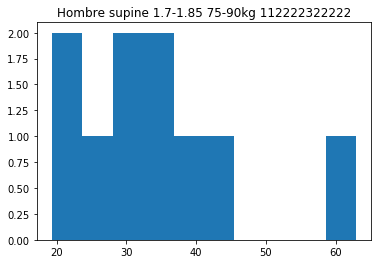

In [40]:
# Grupos interesantes en male supine
hombres_10_sup_med = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="112222322222")]
plt.hist(hombres_10_sup_med['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 75-90kg 112222322222")
plt.show()

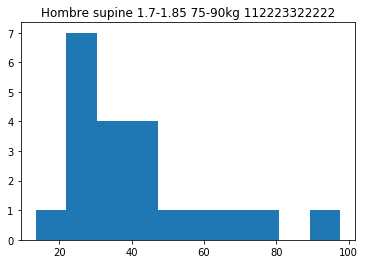

In [50]:
hombres_21 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="112223322222")]
plt.hist(hombres_21['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 75-90kg 112223322222")
plt.show()

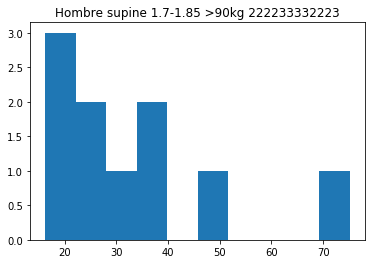

In [51]:
hombres_10_sup_alt = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]==">90") &
            (perfiles_sqr["presiones"]=="222233332223")]
plt.hist(hombres_10_sup_alt['sqr'], bins = 10)
plt.title("Hombre supine 1.7-1.85 >90kg 222233332223")
plt.show()

### Hombres lateral

In [27]:
summary_male_lateral = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral")].\
    groupby(["altura_cat_hombre","peso_cat_hombre","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_male_lateral=summary_male_lateral[summary_male_lateral['sqr']['size']>min_obs]
summary_male_lateral

sqr                      \
                                                     min      max       mean   
altura_cat_hombre peso_cat_hombre presiones                                    
1.7-1.85          75-90           002223321222  2.146500  86.4615  39.246447   
                  >90             223333432223  0.546476  64.6698  38.560488   

                                                                
                                                      std size  
altura_cat_hombre peso_cat_hombre presiones                     
1.7-1.85          75-90           002223321222  25.267366   16  
                  >90             223333432223  18.494756   10

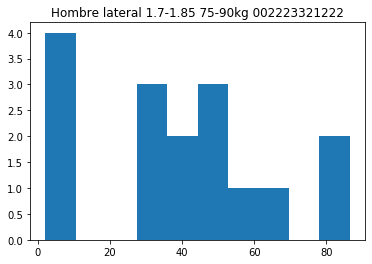

In [48]:
hombres16 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]=="75-90") &
            (perfiles_sqr["presiones"]=="002223321222")]

plt.hist(hombres16['sqr'], bins = 10)
plt.title("Hombre lateral 1.7-1.85 75-90kg 002223321222")
plt.show()

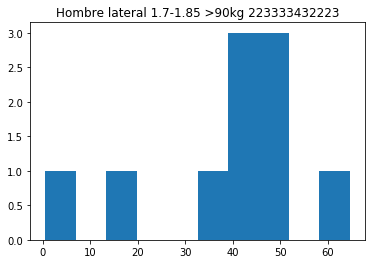

In [49]:
hombres10 = perfiles_sqr[(perfiles_sqr["sexo"]=="Male") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_hombre"]=="1.7-1.85") & (perfiles_sqr["peso_cat_hombre"]==">90") &
            (perfiles_sqr["presiones"]=="223333432223")]
plt.hist(hombres10['sqr'], bins = 10)
plt.title("Hombre lateral 1.7-1.85 >90kg 223333432223")
plt.show()

### Mujeres supine

In [30]:
summary_female_supine = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine")].\
    groupby(["altura_cat_mujer","peso_cat_mujer","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_female_supine=summary_female_supine[summary_female_supine['sqr']['size']>min_obs]
summary_female_supine

sqr                      \
                                                    min      max       mean   
altura_cat_mujer peso_cat_mujer presiones                                     
1.6-1.7          50-65          112222222222   0.323799  53.5324  33.062654   
                 65-80          112223222222  13.995000  65.7563  34.027090   

                                                              
                                                    std size  
altura_cat_mujer peso_cat_mujer presiones                     
1.6-1.7          50-65          112222222222  18.718768   11  
                 65-80          112223222222  16.806733   10

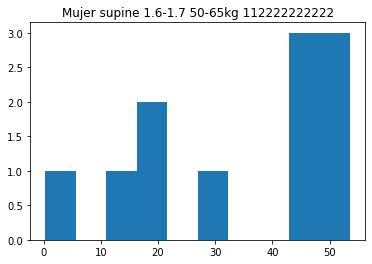

In [46]:
mujeres11 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="112222222222")]
plt.hist(mujeres11['sqr'], bins = 10)
plt.title("Mujer supine 1.6-1.7 50-65kg 112222222222")
plt.show()

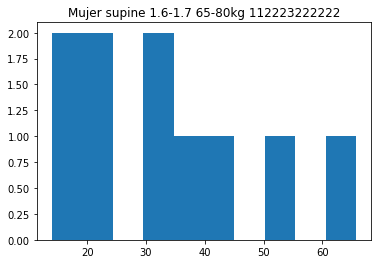

In [47]:
mujeres10 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Supine") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="65-80") &
            (perfiles_sqr["presiones"]=="112223222222")]
plt.hist(mujeres10['sqr'], bins = 10)
plt.title("Mujer supine 1.6-1.7 65-80kg 112223222222")
plt.show()

### Mujeres lateral

In [33]:
summary_female_lateral = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral")].\
    groupby(["altura_cat_mujer","peso_cat_mujer","presiones"]).agg({'sqr': [min, max, 'mean', 'std',"size"]})
summary_female_lateral=summary_female_lateral[summary_female_lateral['sqr']['size']>min_obs]
summary_female_lateral

sqr                      \
                                                    min      max       mean   
altura_cat_mujer peso_cat_mujer presiones                                     
1.5-1.6          50-65          002222112222   5.260960  53.3149  28.749206   
1.6-1.7          50-65          001122211222   0.093528  63.1079  28.114961   
                 65-80          002233211222  11.195800  67.4817  33.063356   

                                                              
                                                    std size  
altura_cat_mujer peso_cat_mujer presiones                     
1.5-1.6          50-65          002222112222  15.133176   12  
1.6-1.7          50-65          001122211222  15.139790   20  
                 65-80          002233211222  16.162322   16

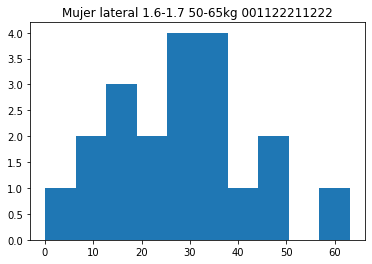

In [43]:
mujeres20 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="001122211222")]
plt.hist(mujeres20['sqr'], bins = 10)
plt.title("Mujer lateral 1.6-1.7 50-65kg 001122211222")
plt.show()

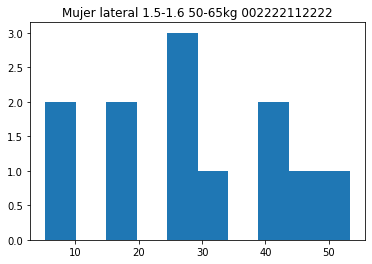

In [44]:
mujeres12 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.5-1.6") & (perfiles_sqr["peso_cat_mujer"]=="50-65") &
            (perfiles_sqr["presiones"]=="002222112222")]
plt.hist(mujeres12['sqr'], bins = 10)
plt.title("Mujer lateral 1.5-1.6 50-65kg 002222112222")
plt.show()

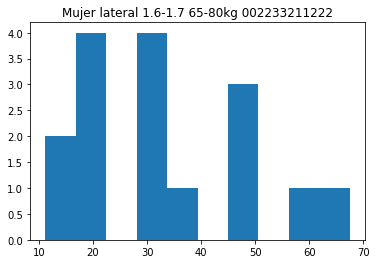

In [45]:
mujeres16 = perfiles_sqr[(perfiles_sqr["sexo"]=="Female") & (perfiles_sqr["posicion"]=="Lateral") &
            (perfiles_sqr["altura_cat_mujer"]=="1.6-1.7") & (perfiles_sqr["peso_cat_mujer"]=="65-80") &
            (perfiles_sqr["presiones"]=="002233211222")]
plt.hist(mujeres16['sqr'], bins = 10)
plt.title("Mujer lateral 1.6-1.7 65-80kg 002233211222")
plt.show()